In [88]:
import numpy as np
import numpy.polynomial
import matplotlib.pyplot as plt

## Read UTM coordinates
Read data file with UTM coordinates of coastline of Great Britain.

In [89]:
GButm = np.loadtxt('data/GB.utm')
print(GButm.shape)
emin = GButm[:,0].min()
emax = GButm[:,0].max()

nmin = GButm[:,1].min()
nmax = GButm[:,1].max()

(508, 2)


## Define boxes
Set discretisation for boxes covering area, then
- calculate corner coordinates `east` and `north` for each box
- calculate midpoint `center` for each box

In [94]:
npoints = 21
east    = np.linspace(emin,emax,npoints)
north   = np.linspace(nmin,nmax,npoints)

nbox   = (npoints-1)**2
center = np.zeros(nbox*2).reshape(nbox,2)
ibox   = 0
for i in range(east.shape[0]-1):
    for j in range(north.shape[0]-1):
        center[ibox,0] = 0.5*(east[i]+east[i+1])
        center[ibox,1] = 0.5*(north[j]+north[j+1])
        ibox += 1
print(npoints,nbox)

21 400


## Points-in-polygon algorithm
Here, a ray-tracing algorithm is used, [see]().

In [95]:
def ray_tracing_method(x,y,poly):
    """
    points-in-polygon algorithm
    from: ?
    """
    n = len(poly)
    inside = False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

## Test run
Use points-in-polygon algorithm with coastline as polygon and center points of boxes as points
to check, weather box covers cland or sea (via center point).

Then plot result ...

In [96]:
inside = np.zeros(center.shape[0],dtype=bool)
for ibox in range(nbox):
    inside[ibox] =ray_tracing_method(center[ibox,0],center[ibox,1],GPutm)
print(inside)

[False False False False False False False False False False False False
 False False False  True False False False False  True False False False
 False False False False False False False False False  True  True  True
  True  True False False False False False False  True False False False
 False False False  True False False  True  True  True  True  True False
 False  True False False  True False False False False False False  True
  True  True  True  True  True  True  True  True False  True  True False
  True False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True  True False  True False False  True  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True False False False  True  True  True  T

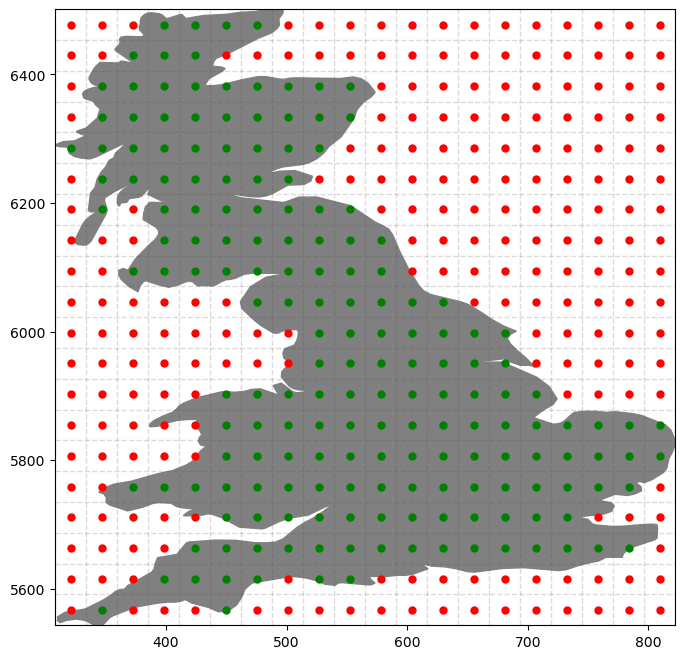

In [97]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
#ax.set_aspect('equal','box')
ax.set_xlim([emin,emax])
ax.set_ylim([nmin,nmax])
ax.fill(GButm[:,0],GButm[:,1],color=(0.5,0.5,0.5))
for i in range(east.shape[0]):
    ax.plot([east[i],east[i]],(ymin,ymax),lw=1,ls='dashed',color=(0.3,0.3,0.3,0.2))
    ax.plot((xmin,xmax),[north[i],north[i]],lw=1,ls='dashed',color=(0.3,0.3,0.3,0.2))
for ibox in range(nbox):
    if (inside[ibox]): ax.plot(center[ibox,0],center[ibox,1],lw=0,marker='o',markersize=5,color='green')
    if (not inside[ibox]): ax.plot(center[ibox,0],center[ibox,1],lw=0,marker='o',markersize=5,color='red')

## Fractal dimension of coastline

In [130]:
npoints = 50
s = np.array([])
N = np.array([])

for ipoint in range(2,npoints):
    # calculate number of boxes, center points
    east    = np.linspace(emin,emax,ipoint)
    north   = np.linspace(nmin,nmax,ipoint)

    nbox   = (ipoint-1)**2
    center = np.zeros(nbox*2).reshape(nbox,2)
    ibox   = 0
    for i in range(east.shape[0]-1):
        for j in range(north.shape[0]-1):
            center[ibox,0] = 0.5*(east[i]+east[i+1])
            center[ibox,1] = 0.5*(north[j]+north[j+1])
            ibox += 1
    # run points-in-polygon algorithm for discretisation level
    inside = np.zeros(center.shape[0],dtype=bool)
    nland = 0
    for ibox in range(nbox):
        inside[ibox] =ray_tracing_method(center[ibox,0],center[ibox,1],GPutm)
        if (inside[ibox]): nland += 1
        
    # collect result (s-discretisation,N-number of boxes inside)
    s = np.append(s,[ipoint],axis=0)
    N = np.append(N,[nland],axis=0)
    print(ipoint," ",end='')
print('done')

2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  done


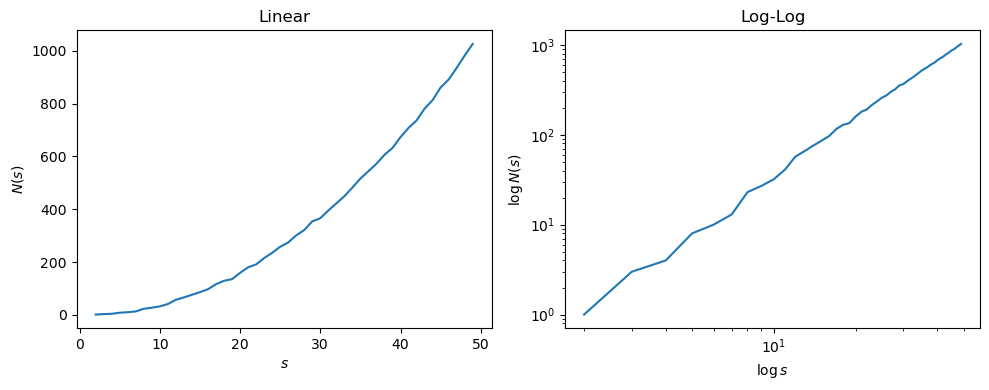

In [131]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].set_title('Linear')
axs[0].set_xlabel('$s$')
axs[0].set_ylabel('$N(s)$')
axs[0].plot(s,N)

axs[1].set_title('Log-Log')
axs[1].set_xlabel('$\log s$')
axs[1].set_ylabel('$\log N(s)$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].plot(s,N)
plt.tight_layout()

In [132]:
D = np.polyfit(np.log10(s),np.log10(N),1)
print('D: ',D)

D:  [ 2.16059597 -0.62542017]


For the coastline of Great Britain, we find by linear regression of `2.16`, which is the **fractal dimension**:
$$\fbox{$
D=2.16
$}$$

----